# HIV SUPPLY INTERNATIONAL DEMAND FORECASTING

#### Author: Beyza Ulasti

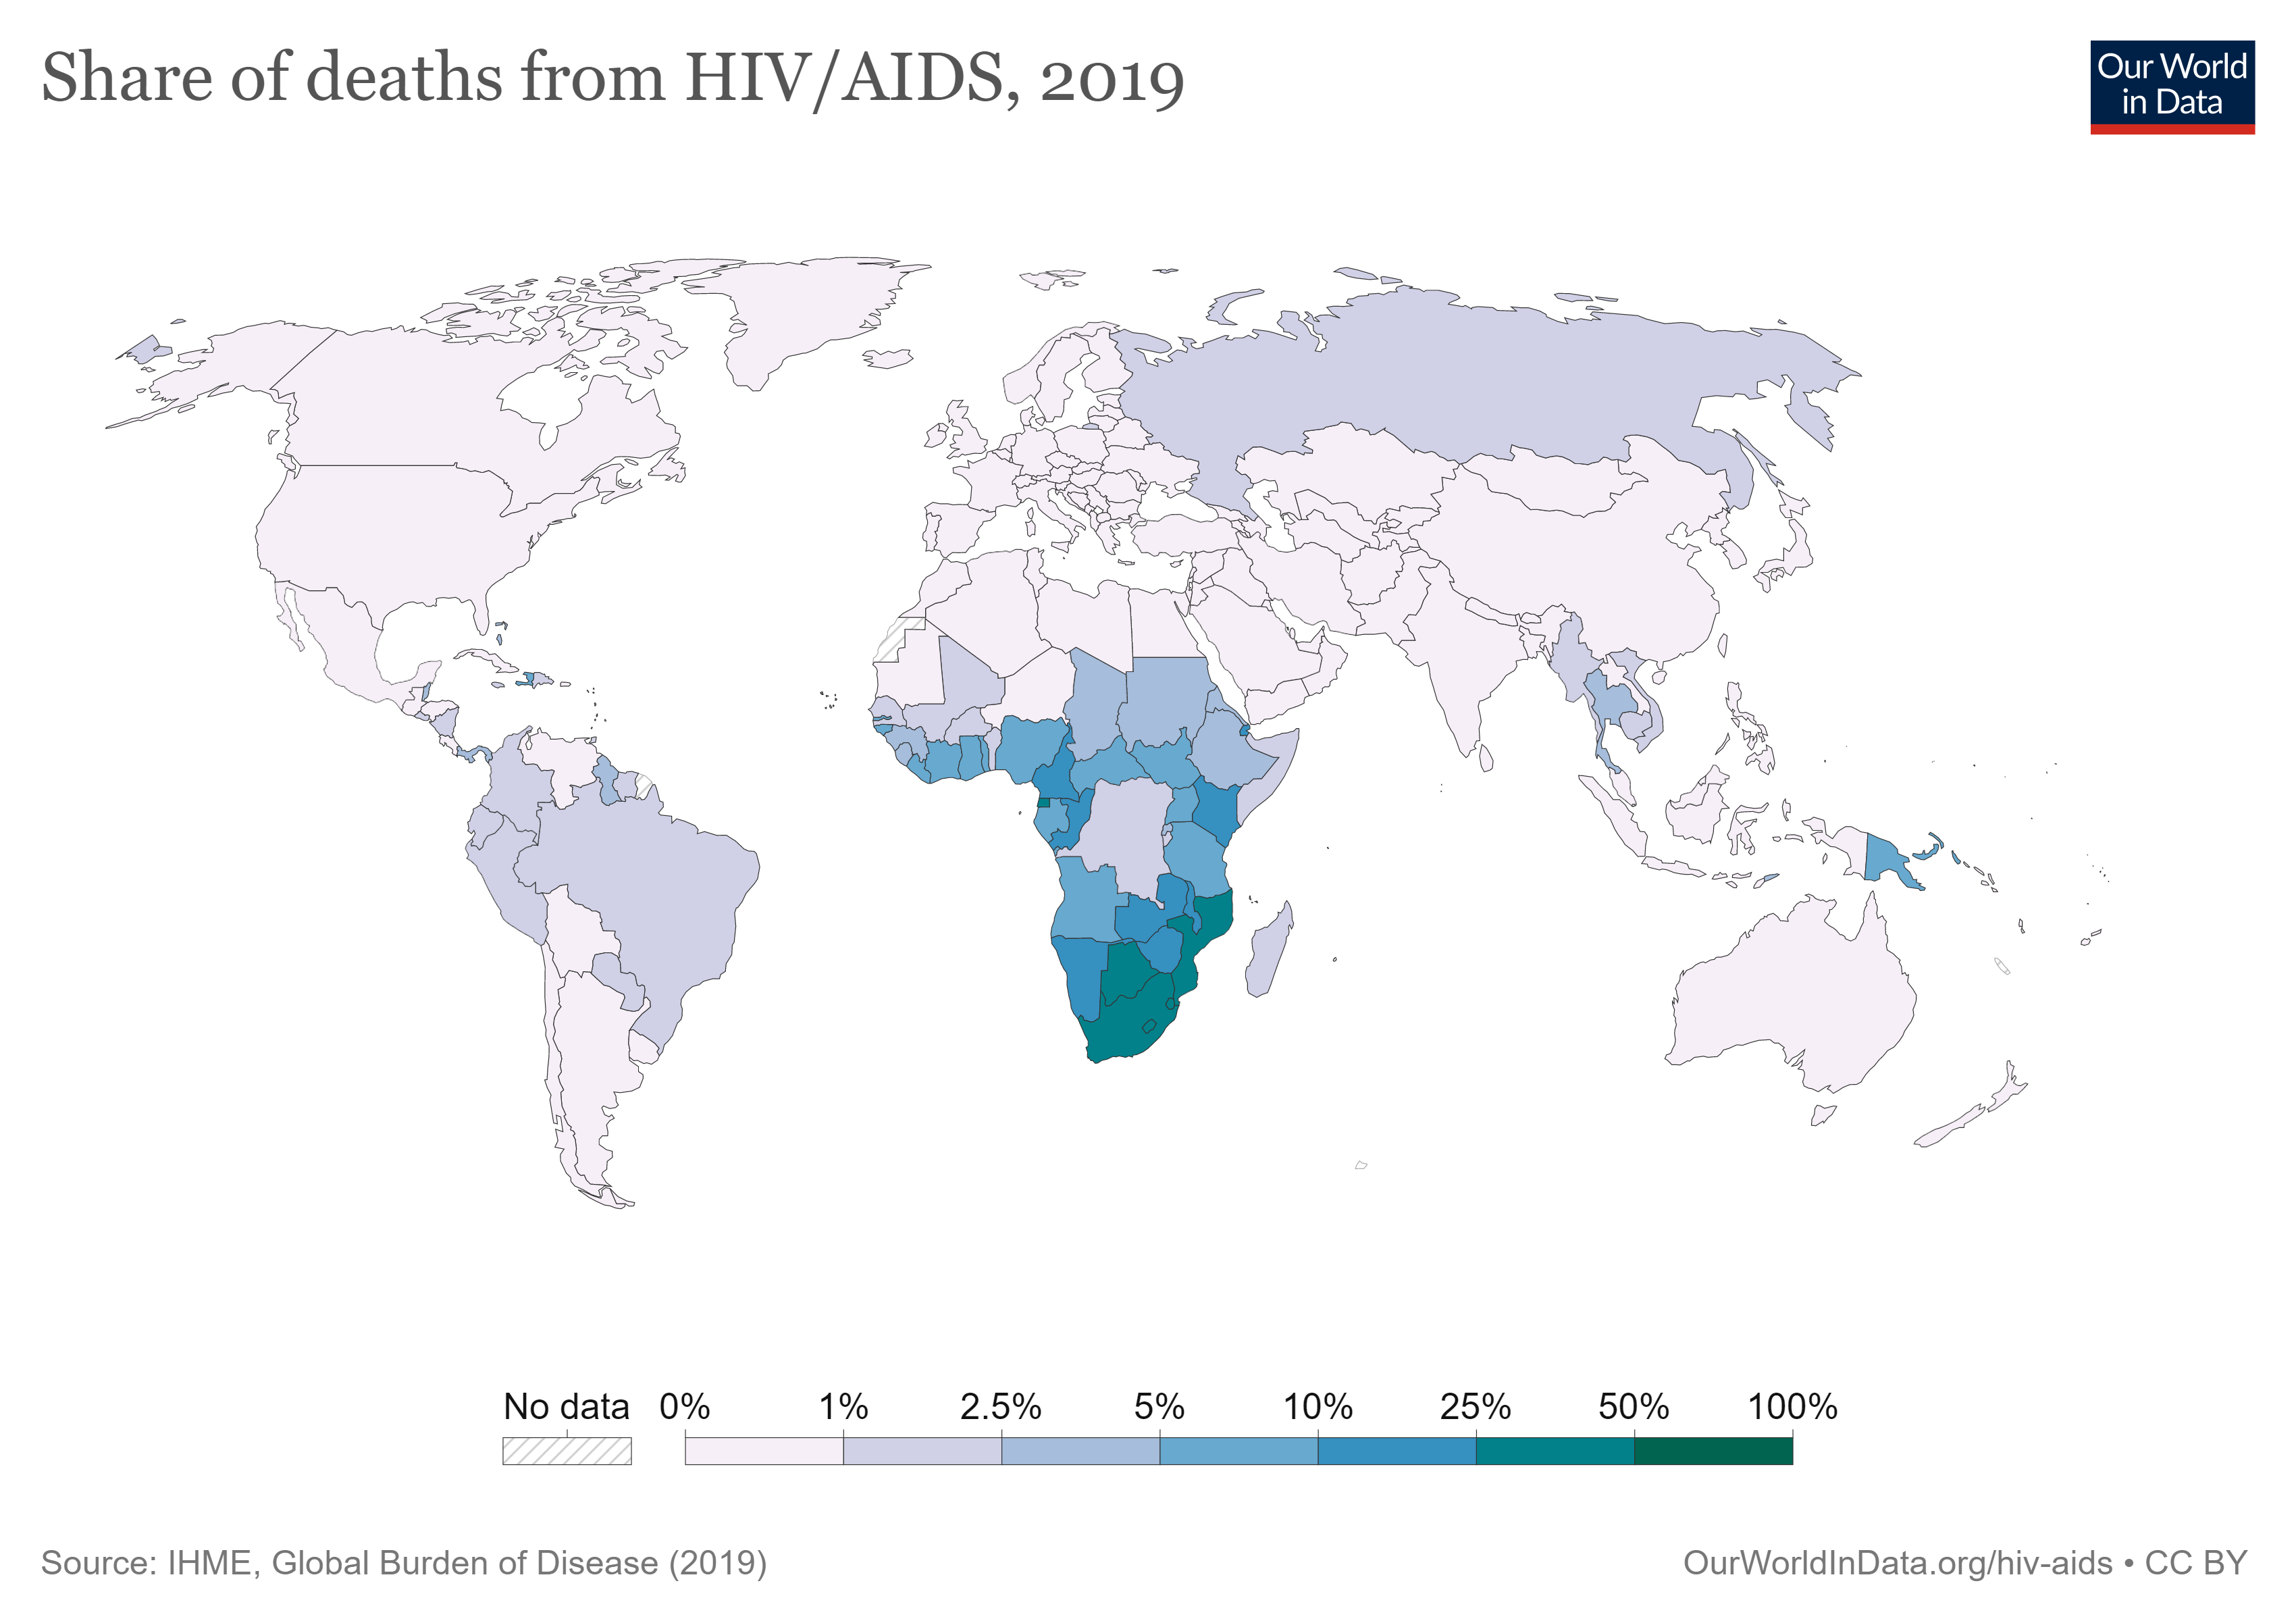

## Business Problem

A ten-year study by The University of New South Wales found that just a 27% increase in people accessing HIV treatment saw HIV infections decrease by 66%. Additionally, according to the World Health Organization, 38.4 million people were HIV positive in 2021, 2/3 of which were in Africa. As HIV is not a curable disease it is important to receive treatment regularly Receiving HIV treatment reduces the amount of HIV in the blood, it prevents transmission to others. And taking HIV medicine as prescribed helps prevent drug resistance.

Demand forecasting can help alleviate the HIV crisis some countries are still facing today. Automating the process would eliminate the need for human resources. furthermore, demand forecasting can help us predict future need to prevent stocks from running dangerously low. The goal is to make sure much-needed medication is accessible on a regular basis.

The United States Agency for International Development (USAID) sends relief to affected countries, so I analyzed the supply chain shipment pricing data for antiretroviral drugs or (ARV) and HIV Rapid Diagnostic Tests or (HRDT).
I narrowed it down to the top 22 countries that received shipments and found that South Africa Nigeria and Côte d'Ivoire received shipments more frequently than others. Although the data ranges from 2006 to 2016, there weren't enough instances in the second half of 2015 so it was discarded as to not skew the model. 
As a limitation, keep in mind that the US government suggests  considering contextual factors when using the database

# Imports

In [59]:
#Dataframe
import pandas as pd
from datetime import datetime as dt
import numpy as np
import pytz
import itertools

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#Modeling
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [60]:
df=pd.read_csv('Data\Supply_Chain_Shipment_Pricing_Data.csv')

In [61]:
df.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [63]:
df['country'].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Lesotho                  4
Sierra Leone             4
Togo                     3
Senegal                  3
A

In [64]:
df['shipment mode'].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: shipment mode, dtype: int64

In [118]:
df['vendor'].value_counts()

SCMS from RDC                                                        5334
S. BUYS WHOLESALER                                                    715
Orgenics, Ltd                                                         691
Aurobindo Pharma Limited                                              665
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                       345
Trinity Biotech, Plc                                                  328
PHARMACY DIRECT                                                       326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                 310
HETERO LABS LIMITED                                                   274
CIPLA LIMITED                                                         175
CHEMBIO DIAGNOSTIC SYSTEMS, INC.                                      109
STRIDES ARCOLAB LIMITED                                                93
Standard Diagnostics, Inc.                                             87
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.

In [78]:
df['sub classification'].value_counts()

Adult                   6348
Pediatric               1861
HIV test                1318
HIV test - Ancillary     129
Malaria                    1
Name: sub classification, dtype: int64

In [79]:
df['item description'].value_counts()

Efavirenz 600mg, tablets, 30 Tabs                                                                                    735
Nevirapine 200mg, tablets, 60 Tabs                                                                                   609
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                                                    594
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                                                     573
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                                                       497
                                                                                                                    ... 
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                                                           1
HIV 1/2, SKB Colloidal Gold, Diagnostic Kit Set, (includes lancet, transfer pipette & alcohol prep pad), 50 Tests      1
Efavirenz 200mg, tablets, 30 Tab

In [80]:
df['product group'].value_counts()

ARV     8209
HRDT    1447
MRDT       1
Name: product group, dtype: int64

>ARV: Antiretroviral drugs for treating and preventing HIV infection


>HRDT: HIV Rapid Diagnostic Test

# Data Cleaning

### Dropping Columns

As the goal is demand forecasting, dropping shipping related columns

In [65]:
df.drop(columns=[
    'pq #',
    'po / so #',
    'asn/dn #', 
    'pq first sent to client date', 
    'po sent to vendor date', 
    'line item insurance (usd)', 
    'id',
    'project code',
    'managed by',
    'fulfill via',
    'vendor inco term',
    'shipment mode',
    'delivery recorded date',
    'molecule/test type',
    'brand',
    'dosage',
    'dosage form',
    'unit of measure (per pack)',
    'pack price',
    'unit price',
    'manufacturing site',
    'first line designation',
    'weight (kilograms)',
    'freight cost (usd)'], inplace=True)

### Dropping Rows

Dropping countries with less than 100 instances

In [66]:
df = df[df['country'].map(df['country'].value_counts()) >= 50]

In [67]:
df['country'].value_counts() #SANITY CHECK

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Name: country, dtype: int64

In [71]:
#Dropping vendors with less than 50 instances
df = df[df['vendor'].map(df['vendor'].value_counts()) >= 50]

## Feature Engineering

In [72]:
#Checking the rows where the two date columns don't match
df['unscheduled_delivery'] = df.apply(lambda row: row['scheduled delivery date'] != row['delivered to client date'], axis=1)
df[df['unscheduled_delivery'] == True]

,country,scheduled delivery date,delivered to client date,product group,sub classification,vendor,item description,line item quantity,line item value,unscheduled_delivery
25,Haiti,13-Aug-07,21-Aug-07,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine HIV Kit, without Lancets, 1...",750,53992.50,True
41,Guyana,9-Apr-08,1-Apr-08,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",240,2.40,True
51,South Africa,25-Apr-08,7-Apr-08,ARV,Pediatric,S. BUYS WHOLESALER,"Didanosine 25mg [Videx], chewable tablets, 60 ...",6,77.10,True
53,Nigeria,9-Jul-08,4-Jul-08,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",5498,54.98,True
57,South Africa,20-Aug-08,8-May-08,ARV,Adult,S. BUYS WHOLESALER,"Didanosine EC 250mg [Videx EC], delayed-releas...",100,1906.00,True
...,...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,31-Jul-15,15-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",166571,599655.60,True
10320,Côte d'Ivoire,31-Jul-15,6-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",21072,137389.44,True
10321,Zambia,31-Aug-15,25-Aug-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,514526,5140114.74,True
10322,Zimbabwe,9-Sep-15,4-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",17465,113871.80,True


In [73]:
#Flagging vendors with the most delayed deliveries 
df[df['unscheduled_delivery'] == True]['vendor'].value_counts()

SCMS from RDC                                                        3298
S. BUYS WHOLESALER                                                    251
Orgenics, Ltd                                                         161
Aurobindo Pharma Limited                                              116
CIPLA LIMITED                                                          29
CHEMBIO DIAGNOSTIC SYSTEMS, INC.                                       13
HETERO LABS LIMITED                                                    11
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.  (KHB)                          10
Standard Diagnostics, Inc.                                             10
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                   7
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                         6
STRIDES ARCOLAB LIMITED                                                 5
Trinity Biotech, Plc                                                    3
MERCK SHARP & DOHME IDEA GMBH (FORMALL

# Datetime

In [74]:
# Making sure the column is str type that datetime can understand
df['delivered to client date'] = df['delivered to client date'].astype(str)

In [75]:
# Converting date column to datetime and setting as index
df['delivered to client date'] = pd.to_datetime(df['delivered to client date'], infer_datetime_format=True)
df.set_index('delivered to client date', inplace=True)

In [76]:
df.head()#SANITY CHECK

,country,scheduled delivery date,product group,sub classification,vendor,item description,line item quantity,line item value,unscheduled_delivery
delivered to client date,,,,,,,,,
2006-11-14,Vietnam,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",1000,6200.00,False
2006-08-11,Vietnam,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",38000,121600.00,False
2006-09-28,Nigeria,28-Sep-06,ARV,Pediatric,Aurobindo Pharma Limited,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",416,2225.60,False
2007-01-08,Zambia,8-Jan-07,ARV,Pediatric,MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK ...,"Efavirenz 200mg [Stocrin/Sustiva], capsule, 90...",135,4374.00,False
2006-11-24,Tanzania,24-Nov-06,ARV,Adult,Aurobindo Pharma Limited,"Nevirapine 200mg, tablets, 60 Tabs",16667,60834.55,False


In [77]:
#Checking null values
df.isnull().sum()

country                    0
scheduled delivery date    0
product group              0
sub classification         0
vendor                     0
item description           0
line item quantity         0
line item value            0
unscheduled_delivery       0
dtype: int64

In [81]:
#Using scheduled delivery date for visualizations
df['scheduled delivery date']= pd.to_datetime(df['scheduled delivery date'])

<AxesSubplot:xlabel='scheduled delivery date', ylabel='line item quantity'>

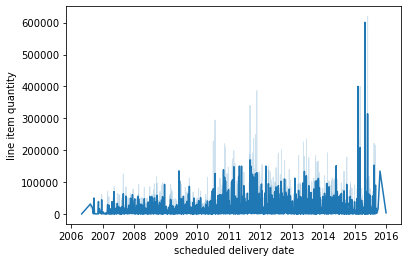

In [82]:
sns.lineplot(x="scheduled delivery date", y="line item quantity", data=df)

## Visualizations for 2015

In [83]:
df_year = df[df["scheduled delivery date"] >= "2015-01-01"]

<AxesSubplot:xlabel='scheduled delivery date', ylabel='line item quantity'>

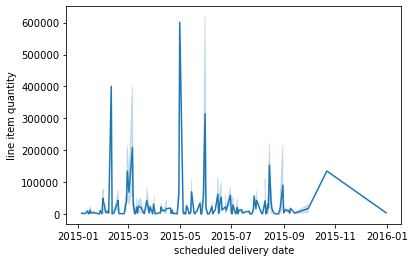

In [84]:
sns.lineplot(x="scheduled delivery date", y="line item quantity", data=df_year)

Above graph goes down nearing 2016 and that's where the supplying ends. It might be necessary to drop the second half of 2015 out of the model to avoid skewing the model. 

<AxesSubplot:xlabel='sub classification', ylabel='line item quantity'>

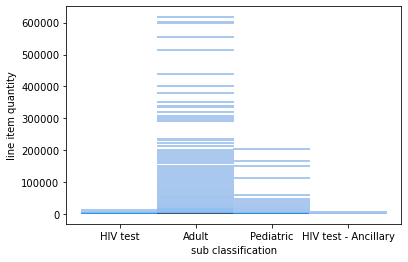

In [117]:
sns.histplot(data=df_year, x="sub classification", y="line item quantity")

## TimeSeries Dataframe

In [86]:
# create time series data
ts_df = df.pivot_table(index='delivered to client date', columns='product group', values='line item quantity')


# convert to datetime
ts_df.index = pd.to_datetime(ts_df.index, format="%d-%m-%Y")
ts_df.index.name = "delivery date"
ts_df.index = ts_df.index.strftime("%m-%Y")

# remove timezone information--fixing plot error
ts_df.index = pd.to_datetime(ts_df.index).tz_localize(None)

# monthly
ts_df = ts_df.resample("M").last()


# handling missing values
ts_df=ts_df.fillna(0)


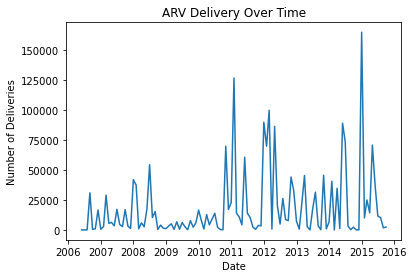

In [87]:
plt.plot(ts_df.index, ts_df['ARV'])

# titles and labels
plt.title('ARV Delivery Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries')


plt.show()

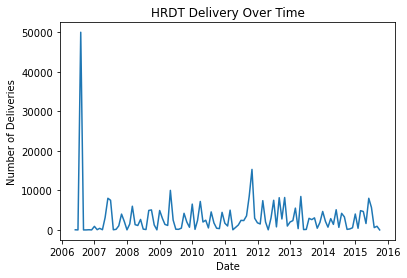

In [88]:
plt.plot(ts_df.index, ts_df['HRDT'])

# titles and labels
plt.title('HRDT Delivery Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries')


plt.show()

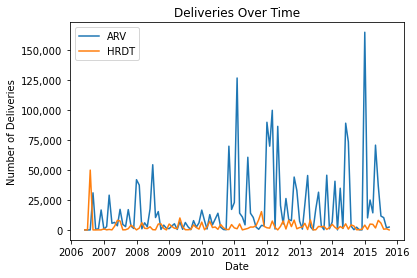

In [89]:
# the data
plt.plot(ts_df.index, ts_df['ARV'], label='ARV')
plt.plot(ts_df.index, ts_df['HRDT'], label='HRDT')

# titles and labels
plt.title('Deliveries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries')

plt.legend()

# set y-axis ticks to include commas for thousands separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ','))) 

#Export plot
plt.savefig('images/deliveries-over-time', transparent=True)
plt.show()

In [90]:
ts_df.head() #SANITY CHECK

product group,ARV,HRDT,MRDT
delivery date,,,
2006-05-31,0.0,31.0,0.0
2006-06-30,0.0,0.0,0.0
2006-07-31,0.0,50000.0,0.0
2006-08-31,31000.0,0.0,0.0
2006-09-30,433.5,0.0,0.0


In [91]:
ts_df['ARV'].max()

165249.25

# Stationarity Test

In [92]:
dftest = adfuller(ts_df['ARV'])
print('p-value:', dftest[1])
alpha=0.05

if dftest[1] < alpha:
    print("The data is stationary")
else:
    print("The data is non-stationary")
 

p-value: 1.4101439569394792e-16
The data is stationary


In [93]:
dftest = adfuller(ts_df['HRDT'])
print('p-value:', dftest[1])
alpha=0.05

if dftest[1] < alpha:
    print("The data is stationary")
else:
    print("The data is non-stationary")


p-value: 0.1997321559460396
The data is non-stationary


# Making HRDT Stationary

### Log Difference

In [94]:
#to avoid getting -inf
ts_df = ts_df + 1

In [95]:
ts_df['HRDT'] = np.log(ts_df['HRDT'])
ts_df['HRDT'] = ts_df['HRDT'].diff()
ts_df = ts_df.drop(ts_df.index[0])

In [96]:
ts_df['HRDT'].isnull().sum()

0

In [97]:
ts_df['HRDT'].fillna(0)

delivery date
2006-06-30    -3.465736
2006-07-31    10.819798
2006-08-31   -10.819798
2006-09-30     0.000000
2006-10-31     3.828641
                ...    
2015-05-31     1.596523
2015-06-30    -0.342263
2015-07-31    -2.271739
2015-08-31     0.456474
2015-09-30    -6.829794
Freq: M, Name: HRDT, Length: 112, dtype: float64

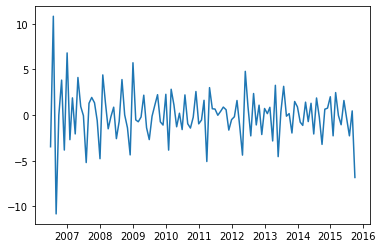

In [98]:
plt.plot(ts_df['HRDT'])

# First Simple Model

In [99]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# ARIMA model
model = sm.tsa.ARIMA(train_data['ARV'], order=(1, 1, 1), dates=train_data.index, freq='M')
results = model.fit()

arv_pred = results.predict(start='11-2014', end='10-2015')

#error
mae = pd.Series.abs(arv_pred - test_data['ARV']).mean()
print('Mean Absolute Error:', mae)

Mean Absolute Error: 28586.05681335224


In [100]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]


# ARIMA model
model = sm.tsa.ARIMA(train_data['HRDT'], order=(1, 1, 1), dates=train_data.index, freq='M')
results = model.fit()

hrdt_pred = results.predict(start='11-2014', end='10-2015')

# error
mae = pd.Series.abs(hrdt_pred - test_data['HRDT']).mean()
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.8389643897674766


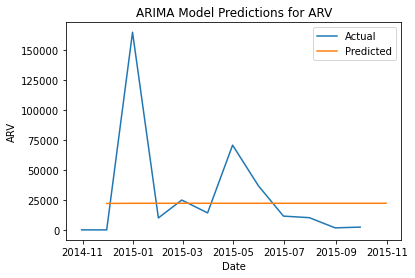

In [101]:
plt.plot(test_data.index, test_data['ARV'], label='Actual')
plt.plot(arv_pred.index, arv_pred, label='Predicted')

plt.title('ARIMA Model Predictions for ARV')
plt.xlabel('Date')
plt.ylabel('ARV')
plt.legend()

plt.show()

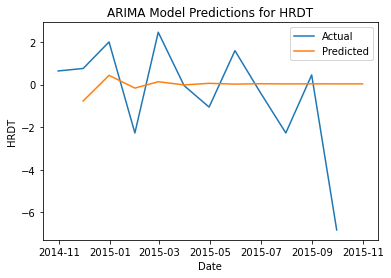

In [102]:
plt.plot(test_data.index, test_data['HRDT'], label='Actual')
plt.plot(hrdt_pred.index, hrdt_pred, label='Predicted')

plt.title('ARIMA Model Predictions for HRDT')
plt.xlabel('Date')
plt.ylabel('HRDT')
plt.legend()

plt.show()

# SARIMA

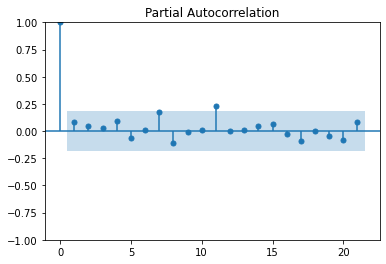

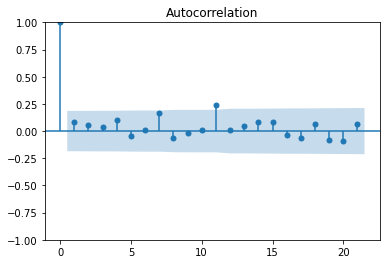

In [103]:
plot_pacf(ts_df['ARV'], method='ywm');
plot_acf(ts_df['ARV']);

In [104]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data['ARV'], order=(0,0,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Predictions
arv_pred = results.predict(start='11-2014', end='9-2015')

# Error
mae = pd.Series.abs(arv_pred - test_data['ARV']).mean()
print('Mean Absolute Error:', mae)


Mean Absolute Error: 24226.527404192773


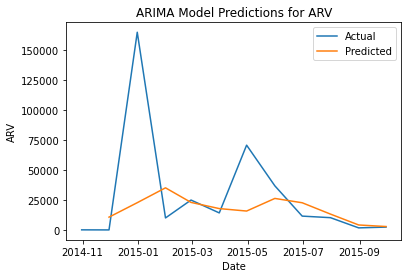

In [105]:
plt.plot(test_data.index, test_data['ARV'], label='Actual')
plt.plot(arv_pred.index, arv_pred, label='Predicted')

plt.title('ARIMA Model Predictions for ARV')
plt.xlabel('Date')
plt.ylabel('ARV')
plt.legend()

plt.show()

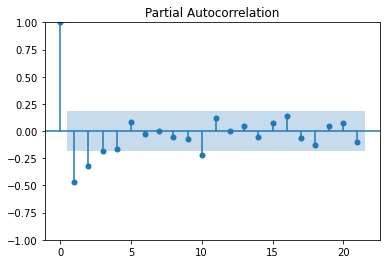

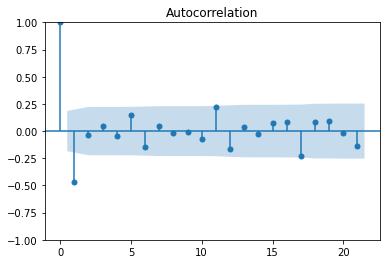

In [106]:
plot_pacf(ts_df['HRDT'], method='ywm');
plot_acf(ts_df['HRDT']);

In [107]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data['HRDT'], order=(2,1,1), seasonal_order=(0,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Predictions
hrdt_pred = results.predict(start='11-2014', end='9-2015')

# Error
mae = pd.Series.abs(hrdt_pred - test_data['HRDT']).mean()
print('Mean Absolute Error:', mae)


Mean Absolute Error: 1.8878892146446908


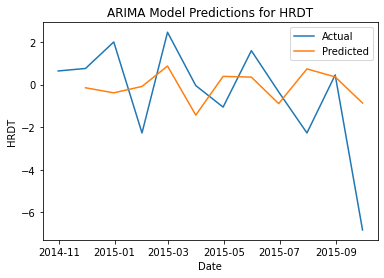

In [108]:
plt.plot(test_data.index, test_data['HRDT'], label='Actual')
plt.plot(hrdt_pred.index, hrdt_pred, label='Predicted')

plt.title('ARIMA Model Predictions for HRDT')
plt.xlabel('Date')
plt.ylabel('HRDT')
plt.legend()

plt.show()

# GridSearch for SARIMA parameters

## GridSearch Citation: https://towardsdatascience.com/grid-search-for-sarimax-parameters-adbd5104cb8b

In [109]:
# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]



# Define function
def sarimax_gridsearch(ts_df, pdq, pdqs, maxiter=50, freq='M'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = [[]]
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts_df,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except Exception as e:
                print(f"Error: {e}")
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
    ans_df = ans_df.dropna()

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df


In [110]:
sarimax_gridsearch(ts_df['ARV'], pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =2659.273692218944
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =2661.439870675303
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =2666.6446652878835
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =2402.1930206387797
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =2382.29905807347
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =2392.022438711366
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =2202.9995558197074
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =2155.7797241445724


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =3685.7380187563103
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =2653.7632742050987
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =2655.7711749839345
SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =2662.186178508345
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =2389.5471285971985
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =2385.0199846721957
SARIMAX (0, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =2393.035558908591
SARIMAX (0, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =2180.327247597003
SARIMAX (0, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =2151.9647280684385


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =3655.8939134704265
SARIMAX (0, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =2658.560308721218
SARIMAX (0, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =2660.1773802689117
SARIMAX (0, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =2661.341124404174
SARIMAX (0, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =2357.268408668697
SARIMAX (0, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =2365.0626639400834
SARIMAX (0, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =2362.8289576229945
SARIMAX (0, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =2122.9849277163585
SARIMAX (0, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =2114.6384647158097


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMAX (0, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =3001.954801370264
SARIMAX (0, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =2654.264988800828
SARIMAX (0, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =2655.7190299508397
SARIMAX (0, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =2659.545180781761
SARIMAX (0, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =2405.759303736143
SARIMAX (0, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =2379.4614724569115
SARIMAX (0, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =2381.8381122222063
SARIMAX (0, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =2204.005922705052
SARIMAX (0, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =2168.636184176254


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =3895.2708847071344
SARIMAX (0, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =2655.7215071674577
SARIMAX (0, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =2652.7039059832273
SARIMAX (0, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =2656.565182683916
SARIMAX (0, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =2395.5517436261835
SARIMAX (0, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =2383.1525026401873
SARIMAX (0, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =2385.8324453865584
SARIMAX (0, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =2188.0879894572718
SARIMAX (0, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =2167.995972460237


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =3185.4233296891866
SARIMAX (0, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =2659.784373398158
SARIMAX (0, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =2657.073065683654
SARIMAX (0, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =2658.3544392652802
SARIMAX (0, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =2376.4689614067333
SARIMAX (0, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =2380.8366349523335
SARIMAX (0, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =2384.907264734964
SARIMAX (0, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =2158.9632961626385
SARIMAX (0, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =2159.8918201221127
SARIMAX (0, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =7570.409707785038
SARIMAX (0, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =2654.820291620346
SARIMAX (0, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =2658.005289996038
SARIMAX (0, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =2661.5952465138002
SARIMAX (0, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =241

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =3564.106420982678
SARIMAX (0, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =2658.0921359309737
SARIMAX (0, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =2657.128790688179
SARIMAX (0, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =2661.076540145805
SARIMAX (0, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =2400.49733761472
SARIMAX (0, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =2388.4469958072236
SARIMAX (0, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =2391.223280474592
SARIMAX (0, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =2192.6373488708637
SARIMAX (0, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =2172.93497178374


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =4106.6236007564585
SARIMAX (0, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =2662.650183012947
SARIMAX (0, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =2661.5158004465297
SARIMAX (0, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =2662.875638894146
SARIMAX (0, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =2381.984570797516
SARIMAX (0, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =2386.364881866431
SARIMAX (0, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =2390.4139046111186
SARIMAX (0, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =2163.697246386958
SARIMAX (0, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =2164.875720584605
SARIMAX (0, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =7575.709677444425
SARIMAX (0, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =2664.528451487624
SARIMAX (0, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =2672.0005212509755
SARIMAX (0, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =2679.916729006934
SARIMAX (0, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =2454.2

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =4398.780986395827
SARIMAX (0, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =2612.135809734837
SARIMAX (0, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =2610.7829480813366
SARIMAX (0, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =2614.9388603725693
SARIMAX (0, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =2362.5893577792904
SARIMAX (0, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =2366.500194397573
SARIMAX (0, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =2370.3473244653496
SARIMAX (0, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =2147.2359310419633
SARIMAX (0, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =2148.8138966674833
SARIMAX (0, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =7847.389687378795
SARIMAX (0, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =2609.475454590552
SARIMAX (0, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =2614.0726205357923
SARIMAX (0, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =2616.5147414926
SARIMAX (0, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =2392.

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =7854.94711013848
SARIMAX (0, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =2761.534578377753
SARIMAX (0, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =2767.3113158162078
SARIMAX (0, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =2774.587583610961
SARIMAX (0, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =2540.7875881857617
SARIMAX (0, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =2523.465360086984
SARIMAX (0, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =2526.054554612623
SARIMAX (0, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =2321.2574632776696
SARIMAX (0, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =2294.242202067649
SARIMAX (0, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =7874.37108855816
SARIMAX (0, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =2761.1362409106705
SARIMAX (0, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =2770.3582136209734
SARIMAX (0, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =2777.7348033004337
SARIMAX (0, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =2516.8

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =3685.6763169526985
SARIMAX (1, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =2657.415304463222
SARIMAX (1, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =2654.294364974829
SARIMAX (1, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =2654.983336545403
SARIMAX (1, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =2375.3473072698275
SARIMAX (1, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =2379.7103833158885
SARIMAX (1, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =2383.7319796398797
SARIMAX (1, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =2157.184329334819
SARIMAX (1, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =2158.0517720641315
SARIMAX (1, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =7567.8898218630675
SARIMAX (1, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =2631.559010484188
SARIMAX (1, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =2636.193184826673
SARIMAX (1, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =2638.438125476781
SARIMAX (1, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =2410

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =3608.982133547284
SARIMAX (1, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =2636.2158342117787
SARIMAX (1, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =2640.5192146372387
SARIMAX (1, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =2638.9039402826706
SARIMAX (1, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =2399.7808881488186
SARIMAX (1, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =2385.3473474972557
SARIMAX (1, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =2388.017719501049
SARIMAX (1, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =2192.271789543916
SARIMAX (1, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =2172.318920596142


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =3887.515682628763
SARIMAX (1, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =2639.2640425498953
SARIMAX (1, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =2644.7089745390654
SARIMAX (1, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =2645.796324369364
SARIMAX (1, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =2380.1255407505373
SARIMAX (1, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =2383.9569051120125
SARIMAX (1, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =2387.6578124947673
SARIMAX (1, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =2162.538492097914
SARIMAX (1, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =2163.8239592917544
SARIMAX (1, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =7574.692919871575
SARIMAX (1, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =2636.381925693306
SARIMAX (1, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =2640.962367142722
SARIMAX (1, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =2643.375133157427
SARIMAX (1, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =2414

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =3196.876017757747
SARIMAX (1, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =2641.000027522962
SARIMAX (1, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =2645.4091450385367
SARIMAX (1, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =2648.9122066063874
SARIMAX (1, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =2404.809991802953
SARIMAX (1, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =2392.755876809613
SARIMAX (1, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =2395.5359802331027
SARIMAX (1, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =2196.7760835424892
SARIMAX (1, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =2177.0909286032156


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =3624.466944123916
SARIMAX (1, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =2644.074176720668


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =2649.57065355167
SARIMAX (1, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =2650.7662101072456
SARIMAX (1, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =2386.264804076444
SARIMAX (1, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =2390.638697731775
SARIMAX (1, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =2394.7040988976923
SARIMAX (1, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =2168.0004752722434
SARIMAX (1, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =2168.7233325495295
SARIMAX (1, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =7579.812196390326
SARIMAX (1, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =2639.03720890559
SARIMAX (1, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =2642.53245715962
SARIMAX (1, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =2644.2053552636744
SARIMAX (1, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =2423.9455407046153
SARIMAX (1, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =2392.8489269795327
SARIMAX (1, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =2394.1

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMAX (1, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =2617.436146619629
SARIMAX (1, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =2621.9945744083634
SARIMAX (1, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =2395.6422093958186
SARIMAX (1, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =2373.576714323002
SARIMAX (1, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =2375.6847291670565
SARIMAX (1, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =2191.6422855807364
SARIMAX (1, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =2164.0130039569062
SARIMAX (1, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =7894.228606416322
SARIMAX (1, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =2617.892809778344
SARIMAX (1, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =2617.4599731402764
SARIMAX (1, 1, 2) x (1, 0, 2, 12)12 : BIC Calculated =2620.061842259717
SARIMAX (1, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =2388.174468881585
SARIMAX (1, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =2376.884319316502
SARIMAX (1, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =2379

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =2618.4391886157846
SARIMAX (1, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =2621.873538998283
SARIMAX (1, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =2396.696918957267
SARIMAX (1, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =2386.125480303692
SARIMAX (1, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =2389.0743806604482
SARIMAX (1, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =2188.7348927481107
SARIMAX (1, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =2174.7832717966376
SARIMAX (1, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =7760.069303865724
SARIMAX (1, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =2618.4549199415637
SARIMAX (1, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =2623.1582280418993


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =2624.4341264504164
SARIMAX (1, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =2394.081889236966
SARIMAX (1, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =2390.058322705059
SARIMAX (1, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =2393.506433590096
SARIMAX (1, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =2182.9437489546267
SARIMAX (1, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =2176.3350235497887
SARIMAX (1, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =7741.533564996871
SARIMAX (1, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =2622.1625000281597
SARIMAX (1, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =2623.770851275438


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =2628.1298356479165
SARIMAX (1, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =2387.0657413942686
SARIMAX (1, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =2391.267109879345
SARIMAX (1, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =2395.6083474584643
SARIMAX (1, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =2171.271700038312
SARIMAX (1, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =2173.787898432798
SARIMAX (1, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =7675.392896772944
SARIMAX (2, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =2646.7874522672987
SARIMAX (2, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =2651.427920915419
SARIMAX (2, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =2653.943010775633
SARIMAX (2, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =2410.294563881555
SARIMAX (2, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =2383.3374854864433
SARIMAX (2, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =2385.7008828887792
SARIMAX (2, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =2208

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =3562.302646926895
SARIMAX (2, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =2651.4425981931586
SARIMAX (2, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =2651.906170749547
SARIMAX (2, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =2655.320124327411
SARIMAX (2, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =2399.8488219341684
SARIMAX (2, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =2386.9941005429587
SARIMAX (2, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =2389.7254164758147
SARIMAX (2, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =2191.933621618405
SARIMAX (2, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =2171.45523195166


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =3668.3700600001876
SARIMAX (2, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =2655.8387189814725
SARIMAX (2, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =2656.031778402007
SARIMAX (2, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =2656.2367419304937
SARIMAX (2, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =2380.2890352652053
SARIMAX (2, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =2384.664422682261
SARIMAX (2, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =2388.6091617456987
SARIMAX (2, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =2161.8297769116084
SARIMAX (2, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =2163.0015961096997
SARIMAX (2, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =7573.24592716484
SARIMAX (2, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =2636.196664771123
SARIMAX (2, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =2640.7745430837
SARIMAX (2, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =2643.1442416399145
SARIMAX (2, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =2414.

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =2649.3641485781627
SARIMAX (2, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =2650.5019774070306
SARIMAX (2, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =2384.72668949346
SARIMAX (2, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =2388.549024687441
SARIMAX (2, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =2392.2606517504382
SARIMAX (2, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =2166.9598620935158
SARIMAX (2, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =2168.271156922556
SARIMAX (2, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =7579.1648315545
SARIMAX (2, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =2640.3582897693836
SARIMAX (2, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =2644.993755476521
SARIMAX (2, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =2647.4230567308805
SARIMAX (2, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =2413.7449654528996
SARIMAX (2, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =2391.845022872359
SARIMAX (2, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =2393.6

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =2647.6987248632513
SARIMAX (2, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =2405.932565487979
SARIMAX (2, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =2395.618947929459
SARIMAX (2, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =2397.843499315059
SARIMAX (2, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =2195.3471684989836


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =2177.1012874248977
SARIMAX (2, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =35.818694515825655
SARIMAX (2, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =2648.23175492117
SARIMAX (2, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =2653.2981013945196


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =2654.4276176979038
SARIMAX (2, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =2388.511826576393
SARIMAX (2, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =2392.8281566460782
SARIMAX (2, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =2397.131444006811
SARIMAX (2, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =2171.1371719680155
SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =2171.8209999761475
SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =7583.292734433372
SARIMAX (2, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =2632.4256946701175
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =2636.3578760298647
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =2638.432037762996
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =2416.043767304264
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =2384.776537833453
SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =2384.9794703706625
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =220

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =4006.3121383400517
SARIMAX (2, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =2623.4735897853143
SARIMAX (2, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =2622.307001781585
SARIMAX (2, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =2626.388721678999
SARIMAX (2, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =2371.13841828575
SARIMAX (2, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =2374.9623492878186
SARIMAX (2, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =2378.845360002721
SARIMAX (2, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =2154.478918731155
SARIMAX (2, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =2156.07021310364
SARIMAX (2, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =35.72726494923667
SARIMAX (2, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =2617.7875882338294
SARIMAX (2, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =2623.995865953369
SARIMAX (2, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =2626.3807640765253
SARIMAX (2, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =2398.09

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =2623.095536434128
SARIMAX (2, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =2398.801209131472
SARIMAX (2, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =2387.2598331792415
SARIMAX (2, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =2390.201276544868
SARIMAX (2, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =2190.819043477953
SARIMAX (2, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =2175.7875820962745
SARIMAX (2, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =7759.72786361429
SARIMAX (2, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =2619.860438046664
SARIMAX (2, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =2624.581060794973


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =2625.4508926003496
SARIMAX (2, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =2395.7234122142404
SARIMAX (2, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =2391.1929529579384
SARIMAX (2, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =2394.6204727727013
SARIMAX (2, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =2184.528532569654
SARIMAX (2, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =2177.1896473064517
SARIMAX (2, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =7741.192199820613
SARIMAX (2, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =2623.4559759067356
SARIMAX (2, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =2624.7104987248536


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =2629.2052974541643
SARIMAX (2, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =2388.0312248481764
SARIMAX (2, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =2392.2108495460334
SARIMAX (2, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =2396.521582893676
SARIMAX (2, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =2171.8913220851696


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =2173.8189979690665
SARIMAX (2, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =7675.05153236594


,pdq,pdqs,bic
593,"(2, 1, 0)","(2, 2, 2, 12)",31.261357
620,"(2, 1, 1)","(2, 2, 2, 12)",35.727265
557,"(2, 0, 2)","(1, 2, 2, 12)",35.818695
108,"(0, 1, 0)","(2, 2, 2, 12)",1076.964259
26,"(0, 0, 0)","(2, 2, 1, 12)",2114.638465


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                     ARV   No. Observations:                   88
Model:             SARIMAX(2, 1, 0)x(2, 2, [1, 2], 12)   Log Likelihood                -767.000
Date:                                 Wed, 19 Apr 2023   AIC                           1548.000
Time:                                         13:55:57   BIC                           1563.002
Sample:                                     06-30-2006   HQIC                          1553.900
                                          - 09-30-2013                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6823      0.514     -1.328      0.184      -1.689       0

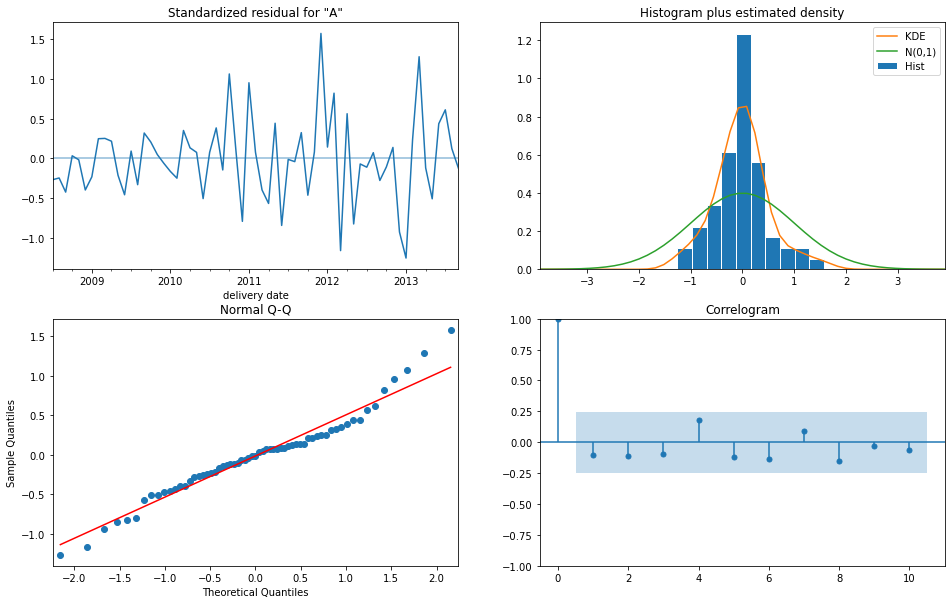

In [111]:
train_data = ts_df.loc[:'09-2013']
test_data = ts_df.loc['10-2013':]

sarimax = sm.tsa.statespace.SARIMAX(train_data['ARV'], 
                                    order=(2,1,0), 
                                    seasonal_order=(2,2,2,12), 
                                    freq='M')
                                    
output = sarimax.fit()
print(output.summary())
output.plot_diagnostics(figsize=(16,10));

In [112]:
# GridSearch for HRDT --Will run for long
sarimax_gridsearch(ts_df['HRDT'], pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =548.9262201906456
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =548.5759494057106
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =553.0042343386145
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =561.695365058578
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =522.7401521956941
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =520.3110616495405
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =580.3788140043195
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =532.9459038636121


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =3014.274862557111
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =548.6353679827155
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =553.1422736005726
SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =555.1602758637925
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =539.6563310505576
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =523.4743013924079
SARIMAX (0, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =523.9175897643012
SARIMAX (0, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =543.8759134243476
SARIMAX (0, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =522.675678908516


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =3504.1713376218195
SARIMAX (0, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =553.0329620141925
SARIMAX (0, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =557.7446904119713
SARIMAX (0, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =557.4392966185967
SARIMAX (0, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =533.2950152714267
SARIMAX (0, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =525.7271241353582
SARIMAX (0, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =527.6529374057257
SARIMAX (0, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =537.9855820857746
SARIMAX (0, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =523.7490106719778


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =3575.7104945347082
SARIMAX (0, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =492.86345112754134
SARIMAX (0, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =496.71115563350537
SARIMAX (0, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =500.7926399292915
SARIMAX (0, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =497.86973493076476
SARIMAX (0, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =475.55382074417815
SARIMAX (0, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =480.14918515597475
SARIMAX (0, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =516.3214383571628
SARIMAX (0, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =477.31840361554055


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =4243.959525375479
SARIMAX (0, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =496.8949308162047
SARIMAX (0, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =500.7363532817441
SARIMAX (0, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =505.391243917946
SARIMAX (0, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =486.7217601415591
SARIMAX (0, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =480.1502967379239
SARIMAX (0, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =484.7117336026186
SARIMAX (0, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =486.66545595640014
SARIMAX (0, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =474.8274434355527


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =3295.761992916355
SARIMAX (0, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =500.9148194277846
SARIMAX (0, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =505.3709856937849


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =506.71936763897173
SARIMAX (0, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =486.72562872974777
SARIMAX (0, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =484.6198475706716
SARIMAX (0, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =489.3098989065466
SARIMAX (0, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =485.0155855207963
SARIMAX (0, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =478.62587090067495


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =3440.1176626691868
SARIMAX (0, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =497.3502602906952
SARIMAX (0, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =501.34934540231933
SARIMAX (0, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =505.25700479046503
SARIMAX (0, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =500.71934334493693
SARIMAX (0, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =480.1229466453056
SARIMAX (0, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =484.72789430850884
SARIMAX (0, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =517.1491900557198
SARIMAX (0, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =480.39077417700196


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =3519.9892778985823
SARIMAX (0, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =501.518259220885
SARIMAX (0, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =505.05263064747766
SARIMAX (0, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =509.61782919275623
SARIMAX (0, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =491.1666002886219
SARIMAX (0, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =484.7279206773111
SARIMAX (0, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =489.2929838368819
SARIMAX (0, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =489.0924932946946
SARIMAX (0, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =479.0274519964788


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =3298.3073438554084
SARIMAX (0, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =505.4375738310666
SARIMAX (0, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =509.5992456728483


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =511.14364373443806
SARIMAX (0, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =491.32993704353686
SARIMAX (0, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =489.22022321266513


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =493.8730472952383
SARIMAX (0, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =488.50899917889467
SARIMAX (0, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =482.9548135817036


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =3381.8310737030774
SARIMAX (0, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =662.0675845090238
SARIMAX (0, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =658.9100341123714
SARIMAX (0, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =662.9209697247285
SARIMAX (0, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =665.5162540487114
SARIMAX (0, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =621.5680232572167
SARIMAX (0, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =608.7574587457443
SARIMAX (0, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =671.2971010136924
SARIMAX (0, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =623.1081948095339


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =3385.930918083067
SARIMAX (0, 1, 0) x (1, 0, 0, 12)12 : BIC Calculated =657.5587733717241
SARIMAX (0, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =662.2019405338583


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =666.9154676216164
SARIMAX (0, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =638.0575110517091
SARIMAX (0, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =616.8209726822643


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =621.9458422787451
SARIMAX (0, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =633.1332079403032
SARIMAX (0, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =608.9351969209293


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =3306.110638921484
SARIMAX (0, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =662.1540711609879
SARIMAX (0, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =666.7866248801777
SARIMAX (0, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =661.2193330197442
SARIMAX (0, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =627.8613607333784
SARIMAX (0, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =617.2245058234014


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =622.3121760662686
SARIMAX (0, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =625.0049422512459
SARIMAX (0, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =607.9379124408866
SARIMAX (0, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =3593.908611608026
SARIMAX (0, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =554.4677013599695
SARIMAX (0, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =554.6561248580111
SARIMAX (0, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =559.22143679329
SARIMAX (0, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =566.2398453182404
SARIMAX (0, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =529.7507518875615
SARIMAX (0, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =528.5425463443993
SARIMAX (0, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =583.7538315555753
SARIMAX (0, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =539.0687295628859


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =3882.1267806503547
SARIMAX (0, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =554.6291936763686
SARIMAX (0, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =559.1984276525751


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =561.3858846714909
SARIMAX (0, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =545.2617618767429
SARIMAX (0, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =530.6887089897385


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =536.0697486436401
SARIMAX (0, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =548.7254350561868
SARIMAX (0, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =529.630330256232


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =3863.711162870981
SARIMAX (0, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =559.1178866117704
SARIMAX (0, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =563.8166922938469
SARIMAX (0, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =566.0899817401958
SARIMAX (0, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =539.5867800592173
SARIMAX (0, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =533.0591692696956
SARIMAX (0, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =535.0069863340382
SARIMAX (0, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =543.5993803548073
SARIMAX (0, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =531.1019307457287


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =3510.781427993671
SARIMAX (0, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =499.01495505366853
SARIMAX (0, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =502.8545201065004
SARIMAX (0, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =506.54100848158015
SARIMAX (0, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =505.3601524988452
SARIMAX (0, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =480.36367697754787
SARIMAX (0, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =484.9520799379428
SARIMAX (0, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =524.5803063893279
SARIMAX (0, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =483.95696930028953


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =3483.429082033806
SARIMAX (0, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =503.0763490992081
SARIMAX (0, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =506.58950269106504


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 0, 2, 12)12 : BIC Calculated =511.0677435382198
SARIMAX (0, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =493.65261809288137
SARIMAX (0, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =484.9524734908874
SARIMAX (0, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =489.51745508905594
SARIMAX (0, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =492.85313751748583
SARIMAX (0, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =481.0199879101317


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =3604.967031821651
SARIMAX (0, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =506.746612881304
SARIMAX (0, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =510.9882617928564


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =515.8897821945851
SARIMAX (0, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =493.902879246548
SARIMAX (0, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =489.72605484457944
SARIMAX (0, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =494.0705868713707
SARIMAX (0, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =491.010727152106
SARIMAX (0, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =484.89275979640365


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =3269.062139108054
SARIMAX (0, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =783.0234409577726
SARIMAX (0, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =778.7569236158765
SARIMAX (0, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =782.4261464251545
SARIMAX (0, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =773.9303727886805
SARIMAX (0, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =727.7294380961846


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =732.9088828681006
SARIMAX (0, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =765.8098025382953
SARIMAX (0, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =717.3524611173476


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =3428.9004626600154
SARIMAX (0, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =776.1030730004281
SARIMAX (0, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =780.7973331683268


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =785.5286214491227
SARIMAX (0, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =743.1203986119477
SARIMAX (0, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =719.1313838234186


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =724.311279025627
SARIMAX (0, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =725.5505341193293
SARIMAX (0, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =700.7899070925318


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =3041.110479788309
SARIMAX (0, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =780.7922915121948


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =781.0365236374778
SARIMAX (0, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =780.4437940954577
SARIMAX (0, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =731.1921632276403
SARIMAX (0, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =718.6423183833886


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =723.6426201823526
SARIMAX (0, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =716.2994338119472
SARIMAX (0, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =699.0003960411148


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =3709.733429699654
SARIMAX (0, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =666.5367076712284
SARIMAX (0, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =664.0444601294826


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =668.0891594602492
SARIMAX (0, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =668.9938812682319
SARIMAX (0, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =627.7727562883109


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =633.5701646895853
SARIMAX (0, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =673.5307949504374
SARIMAX (0, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =628.071153803634


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =3160.8173286078127
SARIMAX (0, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =662.6725884126502
SARIMAX (0, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =667.3405642952941
SARIMAX (0, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =665.9530651607331
SARIMAX (0, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =642.7765094547244
SARIMAX (0, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =623.547185210489
SARIMAX (0, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =620.0401979831347
SARIMAX (0, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =636.8797356284874
SARIMAX (0, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =614.8568815742093


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =3078.7912497852913
SARIMAX (0, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =667.3153560205983
SARIMAX (0, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =671.9452984554766
SARIMAX (0, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =669.6050813667649
SARIMAX (0, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =633.4452768267194
SARIMAX (0, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =624.1576020538622


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =629.4156917068261
SARIMAX (0, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =629.614182563339
SARIMAX (0, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =614.38153603185


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =3628.2065407796317
SARIMAX (0, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =563.9757099138708
SARIMAX (0, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =564.3133015539256
SARIMAX (0, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =568.5313243272819
SARIMAX (0, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =574.83448090669
SARIMAX (0, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =536.0059060988045


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =541.715854588237
SARIMAX (0, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =590.913336877014
SARIMAX (0, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =543.7651810212353


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =2661.8860539625366
SARIMAX (0, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =564.5736653057402
SARIMAX (0, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =568.5839828615813


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =571.4174269793375
SARIMAX (0, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =553.3848238356028
SARIMAX (0, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =536.9050919975152


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =542.1828566158813
SARIMAX (0, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =554.0823491086992
SARIMAX (0, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =533.0653695747677


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =3634.0973510066497
SARIMAX (0, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =568.4339031830318
SARIMAX (0, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =573.1337639710912


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =572.6921570439328
SARIMAX (0, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =546.2943481937562
SARIMAX (0, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =538.6864027076488


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =544.3448856724756
SARIMAX (0, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =547.933993044448
SARIMAX (0, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =533.9891226583264


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =2845.171940588912
SARIMAX (1, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =523.6577686406686
SARIMAX (1, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =525.8518712546069
SARIMAX (1, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =529.2606744294744
SARIMAX (1, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =536.9243770748446
SARIMAX (1, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =503.9902038522558
SARIMAX (1, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =508.10716553708244
SARIMAX (1, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =557.0466436306083
SARIMAX (1, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =512.4364868841025


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =4469.493459639034
SARIMAX (1, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =526.6175804365533
SARIMAX (1, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =529.58453716628
SARIMAX (1, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =533.9434473843787
SARIMAX (1, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =522.484592443045
SARIMAX (1, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =508.2319263380385
SARIMAX (1, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =513.0315096461055
SARIMAX (1, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =524.3520904263947
SARIMAX (1, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =507.7021492090964


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =3155.244506988591
SARIMAX (1, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =529.3869492653341
SARIMAX (1, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =533.593262347438
SARIMAX (1, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =533.1404496118258
SARIMAX (1, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =519.5968252690529
SARIMAX (1, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =511.7628161590132
SARIMAX (1, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =515.262558991266
SARIMAX (1, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =521.8094359701842
SARIMAX (1, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =510.62297077156313


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =3575.349414778384
SARIMAX (1, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =497.3849750312069
SARIMAX (1, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =501.36046133326175
SARIMAX (1, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =505.28574490979855
SARIMAX (1, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =501.3506515601501
SARIMAX (1, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =480.1311308265964
SARIMAX (1, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =484.73503883280694
SARIMAX (1, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =518.7034859498976
SARIMAX (1, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =480.92087134227324


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =3618.263114076879
SARIMAX (1, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =501.53222320619983
SARIMAX (1, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =505.1029966661227
SARIMAX (1, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =509.68313502083146
SARIMAX (1, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =491.22180400029293
SARIMAX (1, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =484.7351877911875
SARIMAX (1, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =489.2987055414544
SARIMAX (1, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =490.0370152495824
SARIMAX (1, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =479.13576634223205


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =3535.5210135225293
SARIMAX (1, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =505.4602530174798
SARIMAX (1, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =509.6669580366236


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =511.17289110506766
SARIMAX (1, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =491.33021611283897
SARIMAX (1, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =489.22149213180444
SARIMAX (1, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =493.8839710330512
SARIMAX (1, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =488.9748458479605
SARIMAX (1, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =483.01288864814353
SARIMAX (1, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =3557.8104302583492
SARIMAX (1, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =501.09625947063495
SARIMAX (1, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =505.1932701053088
SARIMAX (1, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =509.6335911466837
SARIMAX (1, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =503.92891228257025
SARIMAX (1, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =478.5743040476961
SARIMAX (1, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =482.82950223772514
SARIMAX (1, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =52

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =3687.8126350632765
SARIMAX (1, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =505.2830666692765
SARIMAX (1, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =509.64368996489935
SARIMAX (1, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =514.2301511509562
SARIMAX (1, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =487.73649081897895
SARIMAX (1, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =482.8861361419807


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =487.20514705662316
SARIMAX (1, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =492.0965149146923


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =481.4222773510368


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =3488.6053321312593
SARIMAX (1, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =509.6760448853534
SARIMAX (1, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =514.2828240438271


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =515.9780387737006
SARIMAX (1, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =488.20315710099
SARIMAX (1, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =487.3125038545635


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =503.54502979158406
SARIMAX (1, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =491.33981382736715


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =485.2988247591086
SARIMAX (1, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =3498.038980321491
SARIMAX (1, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =604.1153225978562
SARIMAX (1, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =605.1554680570608
SARIMAX (1, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =609.127578857136
SARIMAX (1, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =610.6771811729496
SARIMAX (1, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =574.2355100721524
SARIMAX (1, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =576.3947328790101
SARIMAX (1, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =623.2560635311809
SARIMAX (1, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =576.3224114841258


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =2140.0243280348946
SARIMAX (1, 1, 0) x (1, 0, 0, 12)12 : BIC Calculated =606.2258192903478
SARIMAX (1, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =609.4644353363366
SARIMAX (1, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =614.4355686368699
SARIMAX (1, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =594.7711368055544
SARIMAX (1, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =577.6741472548952
SARIMAX (1, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =578.2791008038979
SARIMAX (1, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =590.9762027994174
SARIMAX (1, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =570.2109047414616


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =2648.9480183648034
SARIMAX (1, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =608.6593533998102
SARIMAX (1, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =613.1778351699896


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =617.857579946518
SARIMAX (1, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =589.023102069235
SARIMAX (1, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =579.6543823397611
SARIMAX (1, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =580.9541367269347
SARIMAX (1, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =585.6926651029617
SARIMAX (1, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =571.292387775788
SARIMAX (1, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =3595.2187583881873
SARIMAX (1, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =530.2758782547004
SARIMAX (1, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =532.8736184101379
SARIMAX (1, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =536.4903133284778
SARIMAX (1, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =542.4234855252629
SARIMAX (1, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =511.529032395681
SARIMAX (1, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =515.7624577007122
SARIMAX (1, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =561.519008888

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =3326.2387601778005
SARIMAX (1, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =533.4733619032216
SARIMAX (1, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =536.8128965039118
SARIMAX (1, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =541.1814206691214
SARIMAX (1, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =528.7797396055479
SARIMAX (1, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =515.8502002085578
SARIMAX (1, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =520.5801104397033
SARIMAX (1, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =530.1715643553259
SARIMAX (1, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =515.4753439236769


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =3831.932784045424
SARIMAX (1, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =536.5151195651208
SARIMAX (1, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =540.8378210689343


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =545.4865970393
SARIMAX (1, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =526.4037867793506
SARIMAX (1, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =519.4781532279592
SARIMAX (1, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =525.0398520857945
SARIMAX (1, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =528.2075191415466
SARIMAX (1, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =518.650572175428


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =3854.3422719858513
SARIMAX (1, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =503.68895466324483
SARIMAX (1, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =507.5615793034439
SARIMAX (1, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =511.228971722415
SARIMAX (1, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =508.9632886812888
SARIMAX (1, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =484.6911497565556
SARIMAX (1, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =489.2784280209198
SARIMAX (1, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =526.9572254969643
SARIMAX (1, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =488.13422226380936


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =3016.6103959626857
SARIMAX (1, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =507.78587808299244
SARIMAX (1, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =511.25518572121615


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 0, 2, 12)12 : BIC Calculated =515.688439274493
SARIMAX (1, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =498.23792641676806
SARIMAX (1, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =489.8417739788621
SARIMAX (1, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =493.8211480691173
SARIMAX (1, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =496.59561205611806
SARIMAX (1, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =485.48236222180196


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =3487.2939035569707
SARIMAX (1, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =511.44897648408187
SARIMAX (1, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =515.6057305675636


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =521.86443337114
SARIMAX (1, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =498.13453100695284
SARIMAX (1, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =494.2887752570645
SARIMAX (1, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =498.4255990628775
SARIMAX (1, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =495.3190642190724


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =489.34983165529576
SARIMAX (1, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =3607.2573573401296
SARIMAX (1, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =702.8310769602849
SARIMAX (1, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =702.8496418476409
SARIMAX (1, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =707.3739883023011
SARIMAX (1, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =698.7198325218993
SARIMAX (1, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =660.1037466774916


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =665.1449295195725
SARIMAX (1, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =700.5916269087493
SARIMAX (1, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =652.4706960126041
SARIMAX (1, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =2736.489190340675
SARIMAX (1, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =703.9669829142267
SARIMAX (1, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =707.4677663134719
SARIMAX (1, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =711.8645662581185
SARIMAX (1, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =680.7230131981294
SARIMAX (1, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =662.5295700002567


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =667.6300789577866
SARIMAX (1, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =667.7369430969488
SARIMAX (1, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =644.7790724434005


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =3016.004138448625
SARIMAX (1, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =706.5630647483113
SARIMAX (1, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =711.2448415815156


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =715.9888578885428
SARIMAX (1, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =672.7371990116327
SARIMAX (1, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =663.7861926030315


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =669.0112783962876
SARIMAX (1, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =659.4454638764964
SARIMAX (1, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =644.2748467384195


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =2946.0379508238943
SARIMAX (1, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =610.1102598059739
SARIMAX (1, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =611.6429669920565
SARIMAX (1, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =615.7124468161194
SARIMAX (1, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =615.8021163526951
SARIMAX (1, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =582.0601955154342


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =587.2539700480892
SARIMAX (1, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =627.1213658965821
SARIMAX (1, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =582.7537063051939


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =3002.9911439773614
SARIMAX (1, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =612.514833280883
SARIMAX (1, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =616.0112579693108
SARIMAX (1, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =620.3572974628573
SARIMAX (1, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =600.8028518014305
SARIMAX (1, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =585.6437409321586


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =590.6677443091546
SARIMAX (1, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =596.1534209028366
SARIMAX (1, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =577.2168503133403


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =3234.326891500022
SARIMAX (1, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =615.2372423591128
SARIMAX (1, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =619.8021532920508


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =624.5764380152517
SARIMAX (1, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =595.7398223539777
SARIMAX (1, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =587.7248622651966


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =593.1220467114717
SARIMAX (1, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =591.5539826674435
SARIMAX (1, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =578.6105291087302


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =2824.3434055709026
SARIMAX (1, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =540.7669051226537
SARIMAX (1, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =543.3445220536336
SARIMAX (1, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =546.4491112941776
SARIMAX (1, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =552.3310322316631
SARIMAX (1, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =519.8242229528491


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =526.5500302864187
SARIMAX (1, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =569.909996805093
SARIMAX (1, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =525.9097806833025
SARIMAX (1, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =2782.8257621916214


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =544.0332790302291
SARIMAX (1, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =546.8332909704953


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =551.0712962300148
SARIMAX (1, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =538.9282019430085
SARIMAX (1, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =524.1072318924016
SARIMAX (1, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =528.8863593957723
SARIMAX (1, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =538.0697880305022
SARIMAX (1, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =521.3091285244898
SARIMAX (1, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =3003.464497777631
SARIMAX (1, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =546.6237054337827
SARIMAX (1, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =550.6626623605903


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =556.1605175400839
SARIMAX (1, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =535.3584480184237
SARIMAX (1, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =527.3121952292656


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =532.5767646971667
SARIMAX (1, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =534.9390132767974
SARIMAX (1, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =523.9348844579318


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =3247.326145439401
SARIMAX (2, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =512.9648424487383
SARIMAX (2, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =515.8074938345386
SARIMAX (2, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =520.1046368979046
SARIMAX (2, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =525.0924050311103
SARIMAX (2, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =494.1269749121818
SARIMAX (2, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =498.21839194011557
SARIMAX (2, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =546.6617051797757
SARIMAX (2, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =502.5821352883145


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =3610.778594279172
SARIMAX (2, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =516.1165573932094
SARIMAX (2, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =519.9931147362936
SARIMAX (2, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =524.7007862483139
SARIMAX (2, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =508.2456028303403
SARIMAX (2, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =498.3154724337485


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =502.47515255093475
SARIMAX (2, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =509.8291341895177
SARIMAX (2, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =496.4309346126755


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =1944.263989894044
SARIMAX (2, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =520.317116830925
SARIMAX (2, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =524.6910542076528


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =524.8099205000821
SARIMAX (2, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =507.40782413634855
SARIMAX (2, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =502.7146805527505


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =507.0190891150378
SARIMAX (2, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =508.93285530823766
SARIMAX (2, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =500.24127446637414


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =3303.4995257832884
SARIMAX (2, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =501.6466164278545
SARIMAX (2, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =505.72529928738294
SARIMAX (2, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =509.78137140940106
SARIMAX (2, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =503.19448414790776
SARIMAX (2, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =483.75605591764344
SARIMAX (2, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =488.358231864776
SARIMAX (2, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =519.3801230566121
SARIMAX (2, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =482.7648720822467


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =3478.901036751018
SARIMAX (2, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =505.86035762132263
SARIMAX (2, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =509.554290097018
SARIMAX (2, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =514.1550800843977
SARIMAX (2, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =493.470649680363
SARIMAX (2, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =488.3584486856061


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =492.8440734761435
SARIMAX (2, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =490.1696811639048
SARIMAX (2, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =481.10888593658336


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =3944.5713450536564
SARIMAX (2, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =509.94328128981925
SARIMAX (2, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =514.1412656344593
SARIMAX (2, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =518.8570802116324
SARIMAX (2, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =494.1142953021104
SARIMAX (2, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =492.92349712669994


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =497.4287129154701
SARIMAX (2, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =489.45828938809603
SARIMAX (2, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =485.1196233926727
SARIMAX (2, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =3589.0894776581845
SARIMAX (2, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =504.603607353834
SARIMAX (2, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =509.0318997417828
SARIMAX (2, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =513.3814969665358
SARIMAX (2, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =507.1303301652493
SARIMAX (2, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =481.5636088566888
SARIMAX (2, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =486.147497476364
SARIMAX (2, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =521.9332003883575
SARIMAX (2, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =486.6102378254124


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =3495.430783233791
SARIMAX (2, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =509.07921519197845
SARIMAX (2, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =513.2382598229824
SARIMAX (2, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =517.8649811826656
SARIMAX (2, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =490.0646912244842
SARIMAX (2, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =486.1484624741574


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =490.06442416000726
SARIMAX (2, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =494.2505654129995
SARIMAX (2, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =485.4808811360407


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =3293.9982330577295
SARIMAX (2, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =513.4474259923383
SARIMAX (2, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =517.8507149863079


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =519.2152666078176
SARIMAX (2, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =498.78952246962655
SARIMAX (2, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =490.74289136341844


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =496.9241904313227
SARIMAX (2, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =493.51898499718686
SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =489.4980663468907


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =3597.8616708057248
SARIMAX (2, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =575.361561987752
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =576.8984364386345
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =581.4154065136078
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =586.8943352831326
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =548.9436539835543
SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =549.1635539511917
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =602.4044487207581
SARIMAX (2, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =556.4668818508673


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =2966.6534387463057
SARIMAX (2, 1, 0) x (1, 0, 0, 12)12 : BIC Calculated =577.3566882076243
SARIMAX (2, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =581.467268102517
SARIMAX (2, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =586.2247141275424
SARIMAX (2, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =567.0731920672546
SARIMAX (2, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =551.5422320055413
SARIMAX (2, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =555.9335648297912
SARIMAX (2, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =566.8815702122221
SARIMAX (2, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =548.0053874282368
SARIMAX (2, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =3071.2109291828183
SARIMAX (2, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =581.4904870092772
SARIMAX (2, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =585.9845485997538
SARIMAX (2, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =589.7611195955149
SARIMAX (2, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =564.28600

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =559.8754838062467
SARIMAX (2, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =565.5069881006784
SARIMAX (2, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =550.7422708601375


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =3441.779877592309
SARIMAX (2, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =520.3595630557973
SARIMAX (2, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =523.5105322064973
SARIMAX (2, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =527.9167562455228
SARIMAX (2, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =531.4033542406002
SARIMAX (2, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =502.3342137667
SARIMAX (2, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =506.5258282806144
SARIMAX (2, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =551.9797291293404
SARIMAX (2, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =510.58690733557376


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =3325.8661978591563
SARIMAX (2, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =523.7360217086805
SARIMAX (2, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =527.8884189208369


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =532.5691894362132
SARIMAX (2, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =515.47785915029
SARIMAX (2, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =506.59715448954717


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =510.683908892
SARIMAX (2, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =516.6928989496141
SARIMAX (2, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =505.07908976070956


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =3814.462399011229
SARIMAX (2, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =528.0530606112392
SARIMAX (2, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =532.5375841642074


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =536.6994078329213
SARIMAX (2, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =515.0709021686584
SARIMAX (2, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =511.02396715579545


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =515.2426648231847
SARIMAX (2, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =516.2881467400863
SARIMAX (2, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =508.9818790957271


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =3524.956161748913
SARIMAX (2, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =508.25811533403794
SARIMAX (2, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =512.2032074923313


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =516.9709372739252
SARIMAX (2, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =511.17820104765985
SARIMAX (2, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =490.2069801079519


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =494.78039451835406
SARIMAX (2, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =527.8092429617867
SARIMAX (2, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =491.41440213524237


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =3490.187622392736
SARIMAX (2, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =512.3989391126969
SARIMAX (2, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =515.9535569583925


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 0, 2, 12)12 : BIC Calculated =521.1351949920585
SARIMAX (2, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =501.834336349819
SARIMAX (2, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =493.81937834714853
SARIMAX (2, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =498.71595400614586
SARIMAX (2, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =498.5693812595629


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =488.8676870968543


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =2296.0359070710283
SARIMAX (2, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =516.1531393350574


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =520.3150453294248


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =526.54048220829


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =502.5292921091138


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =499.3826890075509


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =503.84063130099184


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =497.91111196447923


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =492.8677563031485


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =2856.538909016557
SARIMAX (2, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =656.4112541883155
SARIMAX (2, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =659.064713307728
SARIMAX (2, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =662.8692507943399
SARIMAX (2, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =656.175394834192
SARIMAX (2, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =620.1088018261075


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =625.1318205999755
SARIMAX (2, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =663.3240787378721
SARIMAX (2, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =616.2365847622458


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =2617.464752286193
SARIMAX (2, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =659.6390704285621
SARIMAX (2, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =663.2761830536252
SARIMAX (2, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =668.2987003406937
SARIMAX (2, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =640.8793252835378
SARIMAX (2, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =623.6701637928963
SARIMAX (2, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =625.8498239830036
SARIMAX (2, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =631.7452126676646
SARIMAX (2, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =610.5853204748058


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =3338.945916045457
SARIMAX (2, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =662.4792218919625
SARIMAX (2, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =666.8264219352445


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =671.5049683174325
SARIMAX (2, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =636.8419667682833
SARIMAX (2, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =625.4525782137525


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =631.0328478879181
SARIMAX (2, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =629.3552086052858
SARIMAX (2, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =612.1813447008003


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =3163.0853536116706
SARIMAX (2, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =582.4948277225294
SARIMAX (2, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =584.4472880595268
SARIMAX (2, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =589.008794417137
SARIMAX (2, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =593.1224999494257
SARIMAX (2, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =557.777054970211


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =563.1069129155338
SARIMAX (2, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =607.3400851419514
SARIMAX (2, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =563.8886659279402


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =2386.4269805129757
SARIMAX (2, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =584.8001008615532
SARIMAX (2, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =589.0485136876831
SARIMAX (2, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =593.617752094883
SARIMAX (2, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =574.3685429954271
SARIMAX (2, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =560.456530122806


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =564.8046404225829
SARIMAX (2, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =573.2702919598304
SARIMAX (2, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =556.1750552519604


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =2868.75847064328
SARIMAX (2, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =589.0514714474353
SARIMAX (2, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =593.5946232908395


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =597.3161471382466
SARIMAX (2, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =572.1257506589575
SARIMAX (2, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =563.8806020084392


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =569.4159591721674
SARIMAX (2, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =572.386207154602
SARIMAX (2, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =559.1348191740447


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =3105.041356783801
SARIMAX (2, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =532.0712604874298
SARIMAX (2, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =535.2714661804255


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =539.3238928117557
SARIMAX (2, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =542.3672730091043
SARIMAX (2, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =512.3911827695208


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =518.4539374975411
SARIMAX (2, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =561.4079124136225
SARIMAX (2, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =518.5509318233463


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =2837.9716291422733
SARIMAX (2, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =535.5624035187848
SARIMAX (2, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =539.136719805995


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =544.0293321085258
SARIMAX (2, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =527.2268478693952
SARIMAX (2, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =516.770719969665


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =521.4966057017069
SARIMAX (2, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =526.9273142349814


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =513.5124833423148


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =3244.5893507413084


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =539.5963776694429


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =543.7757719141072


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =548.4190022901993
SARIMAX (2, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =526.6735127670559


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =521.1419684530605


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =585.6117985494038
SARIMAX (2, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =525.7221962371261


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =517.0313177546044


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =3485.016096699095


,pdq,pdqs,bic
44,"(0, 0, 1)","(1, 2, 1, 12)",474.827443
32,"(0, 0, 1)","(0, 1, 1, 12)",475.553821
35,"(0, 0, 1)","(0, 2, 1, 12)",477.318404
302,"(1, 0, 2)","(0, 1, 1, 12)",478.574304
53,"(0, 0, 1)","(2, 2, 1, 12)",478.625871


                                     SARIMAX Results                                      
Dep. Variable:                               HRDT   No. Observations:                   88
Model:             SARIMAX(0, 0, 1)x(1, 2, 1, 12)   Log Likelihood                -173.222
Date:                            Wed, 19 Apr 2023   AIC                            354.445
Time:                                    14:05:16   BIC                            363.081
Sample:                                06-30-2006   HQIC                           357.847
                                     - 09-30-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9220      0.122     -7.541      0.000      -1.162      -0.682
ar.S.L12      -0.4311      0.134   

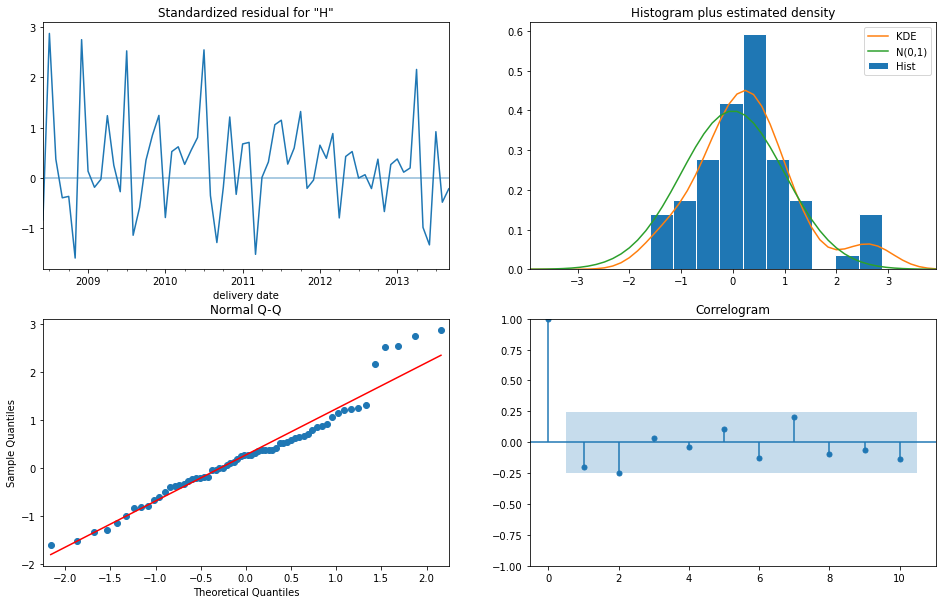

In [113]:
# train-test split
train_data = ts_df.loc[:'09-2013']
test_data = ts_df.loc['10-2013':]

#model
sarimax = sm.tsa.statespace.SARIMAX(train_data['HRDT'], 
                                    order=(0,0,1), 
                                    seasonal_order=(1,2,1,12), 
                                    freq='M')

#results
output = sarimax.fit()
print(output.summary())
output.plot_diagnostics(figsize=(16,10));

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Mean Absolute Error: 2.0786284631826106


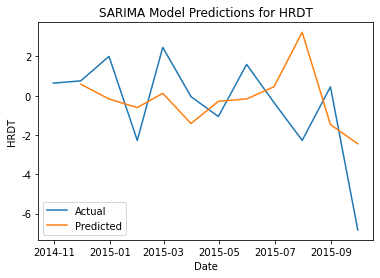

In [114]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data['HRDT'], order=(0,0,1), seasonal_order=(1,2,2,12))
results = model.fit()

# Predictions
hrdt_pred = results.predict(start='11-2014', end='9-2015')

# Error
mae = pd.Series.abs(hrdt_pred - test_data['HRDT']).mean()
print('Mean Absolute Error:', mae)


plt.plot(test_data.index, test_data['HRDT'], label='Actual')
plt.plot(hrdt_pred.index, hrdt_pred, label='Predicted')

plt.title('SARIMA Model Predictions for HRDT')
plt.xlabel('Date')
plt.ylabel('HRDT')
plt.legend()

# set y-axis ticks to include commas for thousands separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ','))) 

#Export plot
plt.savefig('images/sarima-hrdt', transparent=True)
plt.show()

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Mean Absolute Error: 19676.36023641423


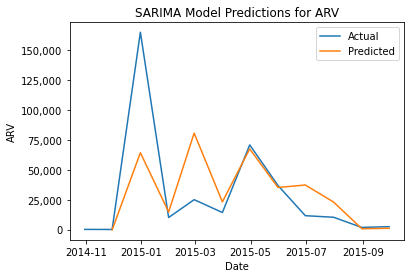

In [115]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data['ARV'], order=(2,1,0), seasonal_order=(2,2,2,12))
results = model.fit()

# Predictions
arv_pred = results.predict(start='11-2014', end='09-2015')

# Error
mae = pd.Series.abs(arv_pred - test_data['ARV']).mean()
print('Mean Absolute Error:', mae)


plt.plot(test_data.index, test_data['ARV'], label='Actual')
plt.plot(arv_pred.index, arv_pred, label='Predicted')

plt.title('SARIMA Model Predictions for ARV')
plt.xlabel('Date')
plt.ylabel('ARV')
plt.legend()

# set y-axis ticks to include commas for thousands separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ','))) 

#Export plot
plt.savefig('images/arima-arv', transparent=True)
plt.show()
